In [104]:
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data as tdata
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from sklearn.neural_network import MLPClassifier

In [ ]:
frame=pd.read_csv('./data/games.csv')

frame=frame[['Release date','Estimated owners','Peak CCU','Required age','Price','DLC count','Median playtime forever']]

months={'Jan':1,
'Feb':2,
'Mar':3,
'Apr':4,
'May':5,
'Jun':6,
'Jul':7,
'Aug':8,
'Sep':9,
'Oct':10,
'Nov':11,
'Dec':12}

owners={'0 - 20000': 0,
'50000 - 100000': 1,
'20000 - 50000': 2,
'200000 - 500000': 3,
'100000 - 200000': 4,
'2000000 - 5000000': 5,
'0 - 0': 6,
'500000 - 1000000': 7,
'1000000 - 2000000': 8,
'20000000 - 50000000': 9,
'5000000 - 10000000': 10,
'10000000 - 20000000': 11,
'50000000 - 100000000': 12,
'100000000 - 200000000': 13}

MAXDATE=24300
MAXOWNERS=len(owners)
MAXCCU=872138
MAXAGE=21
MAXPRICE=999.98
MAXDLC=frame['DLC count'].max()
MAXPLAYF=frame['Median playtime forever'].max()


In [ ]:
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')


prices={}
id=0


for data in frame['Price']:
    if prices.__contains__(data)==False:
        prices[data]=id#(torch.rand(1).item(),torch.rand(1).item(),torch.rand(1).item())
        id+=1

#ln=len(prices)

i=0

# for id in range(300):
#     date=frame['Release date'][id]
#     x1=owners[frame['Estimated owners'][id]]/MAXOWNERS#(months[date.split()[0]]+int(date.split()[len(date.split())-1])*12)/MAXDATE
#     x2=frame['DLC count'][id]/MAXDLC#
#     x3=frame['Required age'][id]#/MAXAGE
#     x4=price[frame['Price'][id]]
#     ax.scatter(x1,x2,x3,c=x4)

    

In [101]:

class Dataset(tdata.Dataset):
    def __init__(self,frame):
        self.date=[]
        self.owners=[]
        self.ccu=[]
        self.age=[]
        self.price=[]
        self.dlc=[]
        self.playtimef=[]
        for data in frame:
            date=data[0]
            self.date.append((months[date.split()[0]]+int(date.split()[len(date.split())-1])*12)/MAXDATE)
            self.owners.append(owners[data[1]]/MAXOWNERS)
            self.ccu.append(data[2]/MAXCCU)
            self.age.append(data[3]/MAXAGE)
            #self.price.append(data[4]/MAXPRICE)
            self.price.append(prices[data[4]])
            self.dlc.append(data[5]/MAXDLC)
            self.playtimef.append(data[6]/MAXPLAYF)
    
    def __getitem__(self,id):
        #return torch.tensor([self.date[id], self.owners[id], self.ccu[id], self.age[id], self.dlc[id]]), torch.tensor(self.price[id])
        return torch.tensor([self.date[id], self.owners[id],  self.age[id]]), torch.tensor(self.price[id])
    
    def getnormal(self,id):
        return self.date[id]*MAXDATE, self.owners[id]*MAXOWNERS, self.ccu[id]*MAXCCU, self.age[id]*MAXAGE, self.price[id]*MAXPRICE, self.dlc[id]*MAXDLC, self.playtimef[id]*MAXPLAYF
    
    def __len__(self):
        return len(self.date)

data_array=frame.to_numpy()
train_array=data_array[0:59500]
test_array=data_array[59500:]

train_data=tdata.DataLoader(Dataset(train_array),batch_size=5000)

test_data=tdata.DataLoader(Dataset(test_array),batch_size=500)



In [117]:
mlpmodel=MLPClassifier(random_state=1, max_iter=300,solver='adam')

train_dataset=Dataset(train_array)

x_train=[]
y_train=[]

for id in range(20000):
    data=train_dataset[id]
    x_train.append(data[0].numpy())
    y_train.append(data[1].numpy())

mlpmodel.fit(x_train,y_train)

x_test=[]
y_test=[]

for id in range(10000):
    data=test_dataset[id]
    x_test.append(data[0].numpy())
    y_test.append(data[1].numpy())


print('Score: ',mlpmodel.score(x_test,y_test))



Score:  0.2415


In [98]:
test_array

class NNet(nn.Module):
    def __init__(self):
        super(NNet,self).__init__()
        self.linear1=nn.Linear(3,8)
        nn.init.xavier_normal(self.linear1.weight)
        self.linear2=nn.Linear(8,16)
        nn.init.xavier_normal(self.linear2.weight)
        self.linear3=nn.Linear(16,8)
        nn.init.xavier_normal(self.linear3.weight)
        #self.linear4=nn.Linear(16,8)
        self.linear5=nn.Linear(8,584)
        nn.init.xavier_normal(self.linear5.weight)

    def forward(self,x):
        x=torch.tanh(self.linear1(x))
        x=torch.tanh(self.linear2(x))
        x=torch.tanh(self.linear3(x))
        #x=torch.relu(self.linear4(x))
        x=self.linear5(x)
        return x
    

In [99]:
model=NNet()



criterion= nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.01)

C:\Users\User\AppData\Local\Temp\ipykernel_11356\2813976395.py:7: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  nn.init.xavier_normal(self.linear1.weight)
C:\Users\User\AppData\Local\Temp\ipykernel_11356\2813976395.py:9: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  nn.init.xavier_normal(self.linear2.weight)
C:\Users\User\AppData\Local\Temp\ipykernel_11356\2813976395.py:11: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  nn.init.xavier_normal(self.linear3.weight)
C:\Users\User\AppData\Local\Temp\ipykernel_11356\2813976395.py:14: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  nn.init.xavier_normal(self.linear5.weight)


  2%|▏         | 1/50 [00:15<12:33, 15.38s/it]

Accuracy:  0.2671171347107761


  4%|▍         | 2/50 [00:18<06:30,  8.14s/it]

Accuracy:  0.2671171347107761


  6%|▌         | 3/50 [00:21<04:35,  5.87s/it]

Accuracy:  0.2671171347107761


  8%|▊         | 4/50 [00:25<03:48,  4.96s/it]

Accuracy:  0.2671171347107761


 10%|█         | 5/50 [00:28<03:14,  4.32s/it]

Accuracy:  0.2671171347107761


 12%|█▏        | 6/50 [00:31<02:54,  3.96s/it]

Accuracy:  0.2671171347107761


 14%|█▍        | 7/50 [00:35<02:46,  3.87s/it]

Accuracy:  0.2671171347107761


 16%|█▌        | 8/50 [00:39<02:47,  3.99s/it]

Accuracy:  0.2671171347107761


 18%|█▊        | 9/50 [00:42<02:33,  3.75s/it]

Accuracy:  0.2671171347107761


 20%|██        | 10/50 [00:45<02:19,  3.50s/it]

Accuracy:  0.2671171347107761


 22%|██▏       | 11/50 [00:48<02:11,  3.37s/it]

Accuracy:  0.26707807678787643


 24%|██▍       | 12/50 [00:51<02:02,  3.23s/it]

Accuracy:  0.2671952505565754


 26%|██▌       | 13/50 [00:54<01:58,  3.20s/it]

Accuracy:  0.2671952505565754


 28%|██▊       | 14/50 [00:58<01:56,  3.23s/it]

Accuracy:  0.2671952505565754


 30%|███       | 15/50 [01:01<01:55,  3.30s/it]

Accuracy:  0.2671952505565754


 32%|███▏      | 16/50 [01:04<01:52,  3.30s/it]

Accuracy:  0.2671952505565754


 34%|███▍      | 17/50 [01:08<01:49,  3.33s/it]

Accuracy:  0.2671952505565754


 36%|███▌      | 18/50 [01:11<01:46,  3.32s/it]

Accuracy:  0.2671952505565754


 38%|███▊      | 19/50 [01:15<01:50,  3.57s/it]

Accuracy:  0.2671952505565754


 40%|████      | 20/50 [01:19<01:47,  3.57s/it]

Accuracy:  0.2671952505565754


 42%|████▏     | 21/50 [01:22<01:41,  3.49s/it]

Accuracy:  0.2671952505565754


 44%|████▍     | 22/50 [01:26<01:38,  3.51s/it]

Accuracy:  0.2671952505565754


 46%|████▌     | 23/50 [01:29<01:34,  3.49s/it]

Accuracy:  0.2671952505565754


 48%|████▊     | 24/50 [01:33<01:35,  3.67s/it]

Accuracy:  0.2671952505565754


 50%|█████     | 25/50 [01:36<01:28,  3.53s/it]

Accuracy:  0.2671952505565754


 52%|█████▏    | 26/50 [01:40<01:22,  3.44s/it]

Accuracy:  0.2671952505565754


 54%|█████▍    | 27/50 [01:43<01:18,  3.42s/it]

Accuracy:  0.2671952505565754


 56%|█████▌    | 28/50 [01:46<01:14,  3.40s/it]

Accuracy:  0.2671952505565754


 58%|█████▊    | 29/50 [01:51<01:16,  3.66s/it]

Accuracy:  0.2671952505565754


 60%|██████    | 30/50 [01:54<01:11,  3.59s/it]

Accuracy:  0.2671952505565754


 62%|██████▏   | 31/50 [01:57<01:06,  3.49s/it]

Accuracy:  0.2671952505565754


 64%|██████▍   | 32/50 [02:01<01:03,  3.55s/it]

Accuracy:  0.2671952505565754


 66%|██████▌   | 33/50 [02:04<00:59,  3.51s/it]

Accuracy:  0.2671952505565754


 68%|██████▊   | 34/50 [02:07<00:53,  3.36s/it]

Accuracy:  0.2671952505565754


 70%|███████   | 35/50 [02:11<00:49,  3.31s/it]

Accuracy:  0.2671952505565754


 72%|███████▏  | 36/50 [02:14<00:47,  3.36s/it]

Accuracy:  0.2671952505565754


 74%|███████▍  | 37/50 [02:17<00:42,  3.28s/it]

Accuracy:  0.2671952505565754


 76%|███████▌  | 38/50 [02:20<00:38,  3.24s/it]

Accuracy:  0.2671952505565754


 78%|███████▊  | 39/50 [02:24<00:36,  3.28s/it]

Accuracy:  0.2671952505565754


 80%|████████  | 40/50 [02:27<00:32,  3.26s/it]

Accuracy:  0.2671952505565754


 82%|████████▏ | 41/50 [02:30<00:28,  3.19s/it]

Accuracy:  0.2671952505565754


 84%|████████▍ | 42/50 [02:33<00:25,  3.15s/it]

Accuracy:  0.2671952505565754


 86%|████████▌ | 43/50 [02:36<00:22,  3.21s/it]

Accuracy:  0.2671952505565754


 88%|████████▊ | 44/50 [02:39<00:19,  3.19s/it]

Accuracy:  0.2671952505565754


 90%|█████████ | 45/50 [02:43<00:16,  3.29s/it]

Accuracy:  0.2672733664023747


 92%|█████████▏| 46/50 [02:47<00:13,  3.40s/it]

Accuracy:  0.2672733664023747


 94%|█████████▍| 47/50 [02:50<00:10,  3.34s/it]

Accuracy:  0.2672733664023747


 96%|█████████▌| 48/50 [02:53<00:06,  3.29s/it]

Accuracy:  0.2672733664023747


 98%|█████████▊| 49/50 [02:56<00:03,  3.28s/it]

Accuracy:  0.2672733664023747


100%|██████████| 50/50 [03:00<00:00,  3.60s/it]

Accuracy:  0.2672733664023747


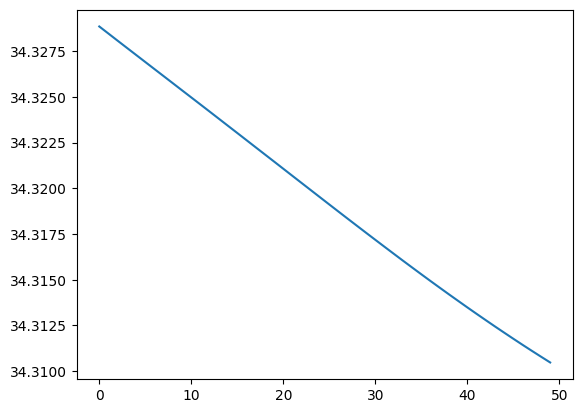

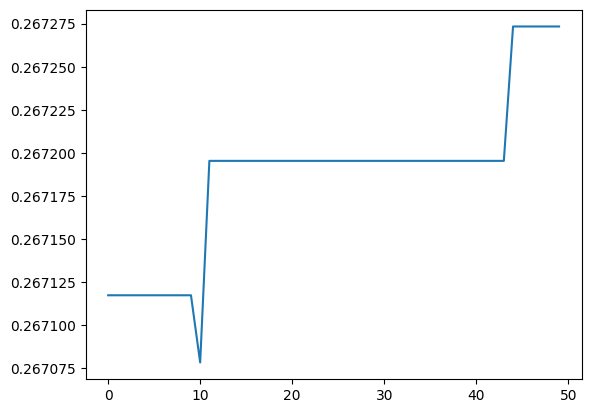

In [118]:
EPOCHS=[]
LOSS=[]

ACCURACY=[]

tloss=100


#epoch=1
for epoch in tqdm(range(50)):
#while tloss>5:
    model.train()
    tloss=0
    for x,y in train_data:
        optimizer.zero_grad()
        py=model(x)
        loss=criterion(py,y)
        loss.backward()
        optimizer.step()
        
        # for val1, val2 in zip(py,y):
        #     if int(val1.item()*MAXPRICE) == int(val2.item()*MAXPRICE):
        #         accuracy+=1

        tloss+=loss.item()
    
    accuracy=0
    model.eval()
    for x,y in test_data:
        py=model(x)
        id=0
        for val in py:
            if torch.argmax(val)==y[id]:
                accuracy+=1
            id+=1

    accuracy/=len(test_array)
    print("Accuracy: ",accuracy)
    #print('Loss: '+str(tloss))
    #print('Epoch: '+str(epoch))
    ACCURACY.append(accuracy)
    EPOCHS.append(epoch)
    LOSS.append(tloss)
    epoch+=1
    




plt.plot(EPOCHS,LOSS)
plt.show()
plt.plot(EPOCHS,ACCURACY)
plt.show()


